# 0.1 Imports

In [42]:
import math
import pandas as pd
import numpy  as np
import pandas as pd
import seaborn as sns

from statsmodels.stats import api as sms
from scipy.stats import shapiro
from statsmodels.stats.multicomp import  pairwise_tukeyhsd

# 0.2 Helper Functions


In [2]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()


# 1.0 Data Description

In [3]:
df_raw = pd.read_csv('/Users/adriele/Documents/repos/ab_testing/dataset/ab_data_james.csv')
df_raw.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df_raw.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [5]:
# # Flags test A

# df_user_delete = df_raw[['user_id', 'group', 'landing_page']].groupby( ['group',
#                                                                      'landing_page'] ).count().reset_index()
# # data without duplicates
# df1 = df_raw[~df_raw['user_id'].isin( df_user_delete )]

# 2.0 Experiment Design

## 2.1 Hypothesis formulation

## 2.2 Experiment Paramiter

In [6]:
# A/B Test - paramiter
# A/B test - Permutacao
# Z-Test ( )


In [7]:
# confidence level
confidence_level = 0.95

# Significance Level
significance_level = 0.05

# Convertions new and old page
p1 = 0.13
p2 = 0.15

# effect size
effect_size = sms.proportion_effectsize( p1, p2)

# Statisc Power
power = 0.80

# Sample size
sample_n = sms.NormalIndPower().solve_power(
                effect_size,
                power=power,
                alpha=significance_level
)

sample_n = math.ceil( sample_n )
sample_n

4720

In [10]:
# Data preparation
df_aux = df_raw[['user_id', 'group']].groupby( 'user_id' ).count().reset_index().query( 'group > 1')
df3 = df_raw[ ~df_raw[ 'user_id'].isin( df_aux['user_id'] ) ]

#df3[['user_id', 'group']].groupby( 'user_id' ).count().reset_index().query( 'group > 1')

# sampling
df_treatment_sample = df3[df3['group'] == 'treatment'].sample( n=sample_n, random_state=32 )
print ( 'Size of Treatment Group: {}'.format( df_treatment_sample.shape[0] ) )

df_control_sample = df3[df3['group'] == 'control'].sample( n=sample_n, random_state=32 )
print ( 'Size of Control Group: {}'.format( df_control_sample.shape[0] ) )

df_ab = pd.concat([df_controlt_sample, df_treatment_sample ]  )



# conversion rate
converted = df_control_sample.loc[df_control_sample['converted'] == 1, 'converted'].sum()
conversion_rate_control = converted / len( df_control_sample['converted'] )
print ( 'Coversion rate - Control Group: {}'.format( conversion_rate_control) )

treatment_converted = df_treatment_sample.loc[df_treatment_sample['converted'] == 1, 'converted'].sum()
conversion_rate_treatment = treatment_converted / len( df_treatment_sample['converted'] )
print ( 'Coversion rate - Control Group: {}'.format( conversion_rate_treatment) )


# hypothesi test
df_table = df_ab[['group', 'converted']].groupby( 'group' ).agg( {'converted': ['sum', 'count']})

# Conclusion

# Result coversion $

Size of Treatment Group: 4720
Size of Control Group: 4720
Coversion rate - Control Group: 0.11864406779661017
Coversion rate - Control Group: 0.11970338983050847


In [12]:
## 2.2 amostragem aleatoria
df_control_sample = df_raw[df_raw['group'] == 'control'].sample( n=sample_n, random_state=42 )
print ( 'Size of Control Group: {}'.format( df_control_sample.shape[0] ) )

# Treatment Group
df_treatment_sample = df_raw[df_raw['group'] == 'treatment'].sample( n=sample_n, random_state=42 )
print ( 'Size of Treatment Group: {}'.format( df_treatment_sample.shape[0] ) )

# Total Sample
df_ab = pd.concat([ df_control_sample, df_treatment_sample] ).reset_index( drop=True )

Size of Control Group: 4720
Size of Treatment Group: 4720


In [14]:
# metrics between groups
# ======================== Group Control =========================
sales = df_control_sample.loc[df_control_sample['converted'] == 1, 'converted'].sum()
visit = len( df_control_sample )

conversion_rate_control = sales / visit
print ( 'Convertion Rate - Control Group: {}'.format( conversion_rate_control ))

# ======================== Group Control =========================
sales = df_treatment_sample.loc[df_treatment_sample['converted'] == 1, 'converted'].sum()
visit = len( df_treatment_sample )

conversion_rate_treatment = sales / visit
print ( 'Convertion Rate - Treatment Group: {}'.format( conversion_rate_treatment ))



# conversao = compradores/ visitantes


Convertion Rate - Control Group: 0.13241525423728814
Convertion Rate - Treatment Group: 0.11991525423728813


# 3.0 Startistic Test

## 3.1 Onse simple test

In [15]:
import numpy as np
from scipy.stats import ttest_1samp
from scipy.stats import shapiro, ttest_ind
from scipy.stats import mannwhitneyu

In [16]:
df = [ 14, 14, 16, 13, 12, 17, 15, 14, 15, 13,15, 14]

# H0 = u = 15 ( The avarange plant height, in fact, is 15 cm )
# H1 = u <> 15 ( The avarange plant height is diferente 15 cm )
np.mean(df)

14.333333333333334

In [18]:
statstic, pvalue = ttest_1samp( df, popmean=15 )
print( 'p_value: {}'.format( p_value ) )

alpha = 0.05
if pvalue < alpha:
    print( 'Accept the null hypothesi' )
    
else: 
    print( 'Failed to reject the null hypothesi ')
    
# I don't have enought evidence showing the averange plants height;
# 

p_value: 0.12014460742498101
Failed to reject the null hypothesi 


## 3.2 Two sample Test

In [19]:
df1 =np.array( [ 14, 15, 15, 13, 12, 17, 15, 14, 15, 13,15, 14, 19, 19, 14, 14, 17, 22, 24, 13, 1, 5])
df2 = np.array([ 15, 17, 14, 17, 8, 12, 19, 19, 14, 14, 17, 22, 24, 13, 16, 16,13, 18, 15, 13, 14, 9])

# H0 = u1 = u2 ( The avarange plant height are the same )
# H1 = u <> 15 ( The avarange plant height are diferente )

print( np.mean( df1 ) )
print( np.mean( df2 ) )

14.545454545454545
15.409090909090908


In [20]:
# Parameters conditions
# 1. Independent sample;
# 1. Normally distributed;

# H0: Non-normal distribution
# H1: Normally distributed 

# If pvalue < alpha:
# print( 'Null Hypoyhesi Rejected')
# pvalue = 0.00001 - Normally

# else
    # print( 'Failed to reject the null hypothesi ')
    # pvalue = 0.89392 - Non-normal
    
    
stats1, pvalue1 = shapiro( df1 ) 
print( 'p-value: {}'.format( pvalue1) )

stats2, pvalue2 = shapiro( df2 ) 
print( 'p-value: {}'.format( pvalue2) )

# Variance test
print( '\nVar 1: {}'.format( np.var( df1 ) ) )
print( 'Var 2: {}'.format( np.var( df2 ) ) )

stats, pvalue = ttest_ind( df1, df2, equal_var=True)
print( 'p-value: {}'.format( pvalue ) )


alpha = 0.05
if pvalue < alpha:
    print( 'reject the null hypothesi')
else:
    print( 'Failed to reject the null hypothesi ')




p-value: 0.008699823170900345
p-value: 0.6836847066879272

Var 1: 22.15702479338843
Var 2: 13.241735537190085
p-value: 0.509564680897056
Failed to reject the null hypothesi 


## 3.3 Mann- Whitney U-test ( unsatisfied parametric conditions)

In [21]:
df1 = [ 20, 23, 21, 25, 18, 17, 18, 24, 26, 24, 23, 19]
df2 = [ 24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

In [22]:
# H0 = u1 = u2 ( The avarange plant height group are the same )
# H1 = u1 <> u2 ( The avarange plant height group are diferente )

# Parameters conditions
# 1. Independent sample;
# 1. Normally distributed;

# H0: Non-normal distribution
# H1: Normally distributed 

# If pvalue < alpha:
# print( 'Null Hypoyhesi Rejected')
# pvalue = 0.00001 - Normally

# else
    # print( 'Failed to reject the null hypothesi ')
    # pvalue = 0.89392 - Non-normal
    
    
stats1, pvalue1 = shapiro( df1 ) 
print( 'p-value: {}'.format( pvalue1) )

stats2, pvalue2 = shapiro( df2 ) 
print( 'p-value: {}'.format( pvalue2) )

# Variance test
print( '\nVar 1: {}'.format( np.var( df1 ) ) )
print( 'Var 2: {}'.format( np.var( df2 ) ) )



#stats, pvalue = ttest_ind( df1, df2, equal_var=False)
stats, pvalue = mannwhitneyu( df1, df2 )
print( 'p-value: {}'.format( pvalue ) )

alpha = 0.05
if pvalue < alpha:
    print( 'reject the null hypothesi')
else:
    print( 'Failed to reject the null hypothesi ')





p-value: 0.39490261673927307
p-value: 0.9021514058113098

Var 1: 8.583333333333334
Var 2: 9.6875
p-value: 0.4327137429856426
Failed to reject the null hypothesi 


In [36]:


df=pd.DataFrame( {'A':[25, 30, 28, 36,29],
                  'B':[45, 55, 29, 56,40],
                  'C':[30, 29, 33, 37,27],
                  'D':[54, 60, 51, 62,73] })

df_melt = pd.melt( df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatment', 'value']
df_melt.head()

,index,treatment,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29


<AxesSubplot:xlabel='treatment', ylabel='value'>

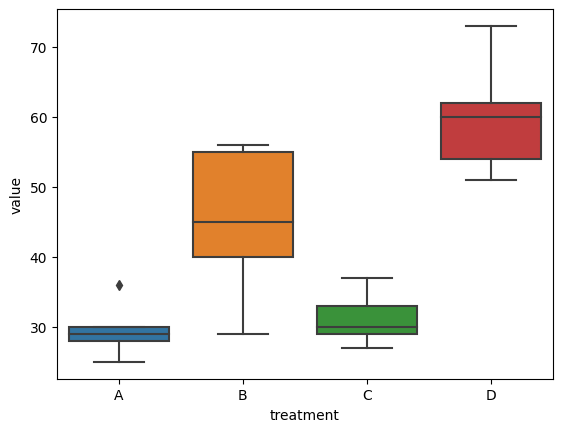

In [37]:
sns.boxplot( x='treatment', y='value', data=df_melt)

## SHAPIRO TEST

In [34]:
print( 'pvalue - Group A: {}'.format( shapiro( df['A'] ) ) )
print( 'pvalue - Group B: {}'.format( shapiro( df['B'] ) ) )
print( 'pvalue - Group C: {}'.format( shapiro( df['C'] ) ) )
print( 'pvalue - Group D: {}'.format( shapiro( df['D'] ) ) )

print( 'variance - Group A: {}'.format( np.var( df['A'] ) ) )
print( 'variance - Group B: {}'.format( np.var( df['B'] ) ) )
print( 'variance - Group C: {}'.format( np.var( df['C'] ) ) )
print( 'variance - Group D: {}'.format( np.var( df['D'] ) ) )

pvalue - Group A: ShapiroResult(statistic=0.9316344261169434, pvalue=0.6075581908226013)
pvalue - Group B: ShapiroResult(statistic=0.9264495968818665, pvalue=0.5723677277565002)
pvalue - Group C: ShapiroResult(statistic=0.9529604315757751, pvalue=0.7583119869232178)
pvalue - Group D: ShapiroResult(statistic=0.9448273181915283, pvalue=0.7002365589141846)
variance - Group A: 13.040000000000001
variance - Group B: 100.4
variance - Group C: 12.16
variance - Group D: 58.0


In [39]:
from scipy.stats import f_oneway
stats, pvalue = f_oneway( df['A'], df['B'],df['C'], df['D'])
print( 'p-value: {}'.format( pvalue ))

p-value: 2.639241146210922e-05


In [44]:
tukey = pairwise_tukeyhsd( endog = df_melt['value'],
                 groups = df_melt['treatment'], 
                 alpha = 0.05)

print( tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     15.4 0.0251   1.694 29.106   True
     A      C      1.6 0.9867 -12.106 15.306  False
     A      D     30.4 0.0001  16.694 44.106   True
     B      C    -13.8 0.0482 -27.506 -0.094   True
     B      D     15.0 0.0296   1.294 28.706   True
     C      D     28.8 0.0001  15.094 42.506   True
---------------------------------------------------
